<a href="https://colab.research.google.com/github/Brenamoreira/Case-Central-de-atendimento/blob/main/An%C3%A1lises_avan%C3%A7adas_TCC_Mercado_de_trabalho_brasileiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Fazer upload do arquivo
from google.colab import files
uploaded = files.upload()


Saving analise_avançada.xlsx to analise_avançada.xlsx


In [4]:
filename = list(uploaded.keys())[0]
data = pd.read_excel(filename)

In [6]:
data['Cod_trimestre'] = pd.to_numeric(data['Cod_trimestre'])

In [5]:
data.head()

,Trimestre,Estado,Taxa_desemprego,Cod_trimestre
0,2018-03-01,Rondônia,10.6,201801
1,2018-03-01,Acre,14.6,201801
2,2018-03-01,Amazonas,14.0,201801
3,2018-03-01,Roraima,10.5,201801
4,2018-03-01,Pará,12.3,201801


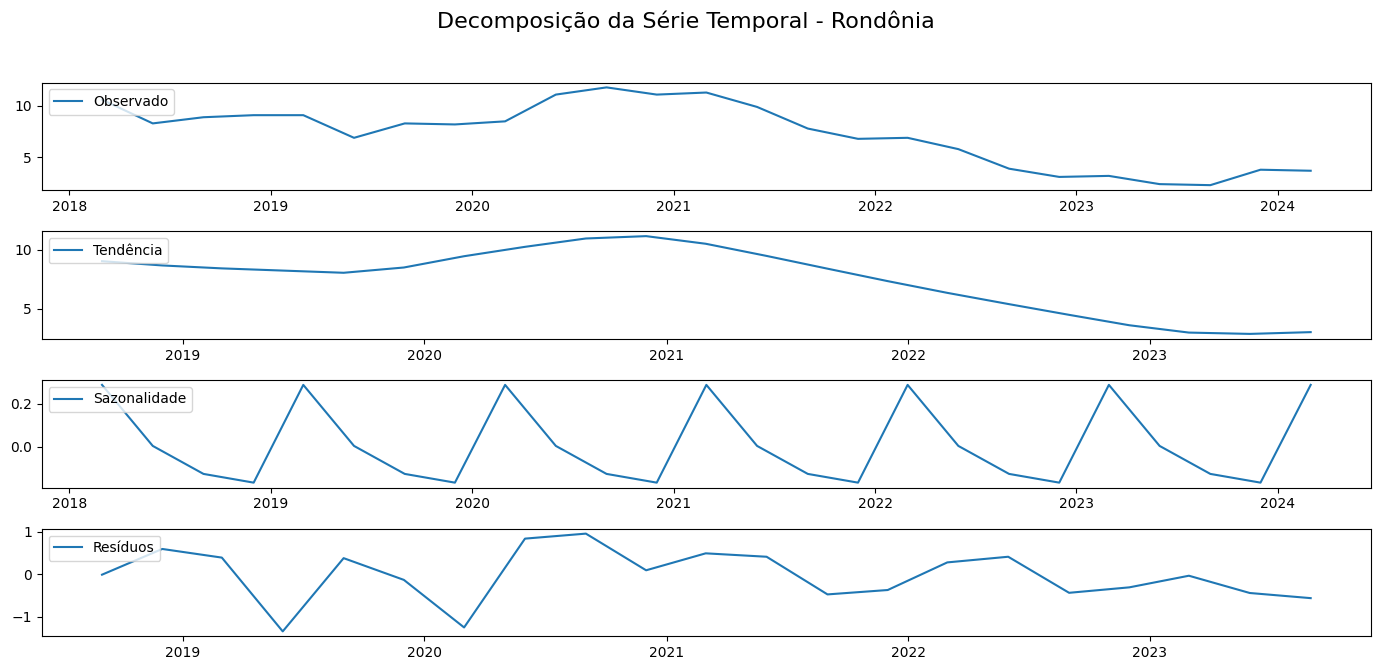

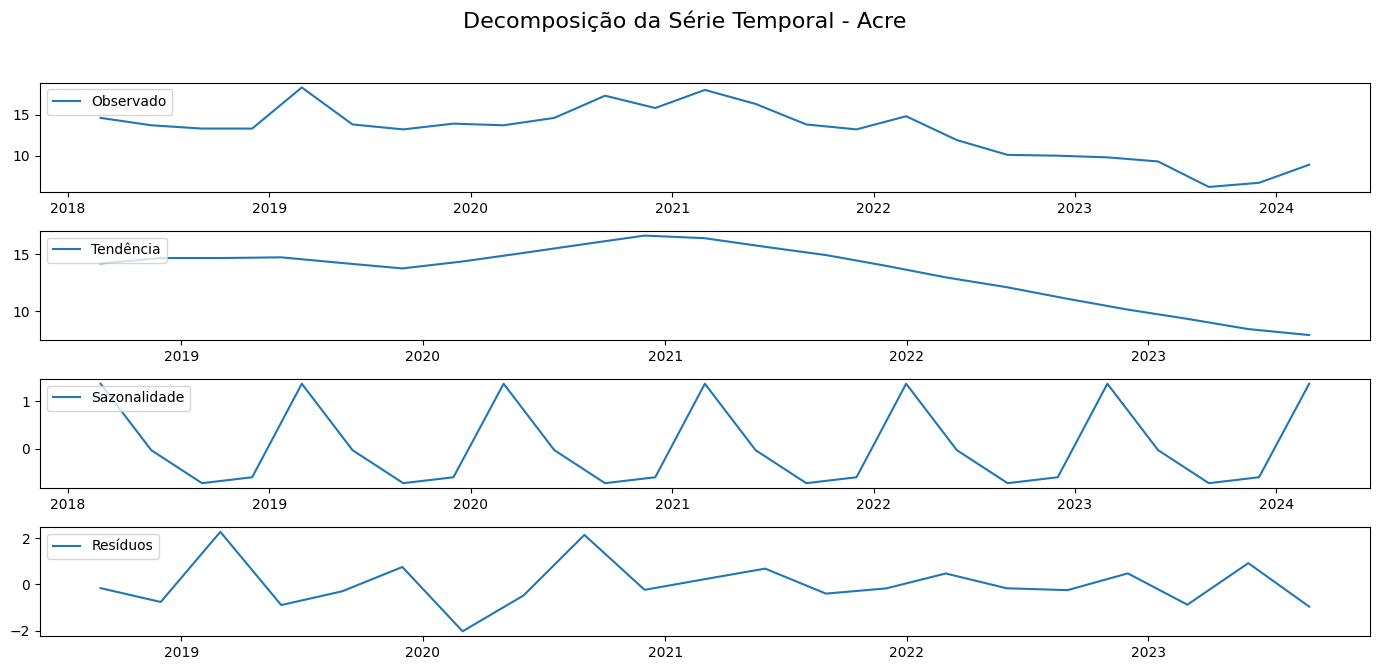

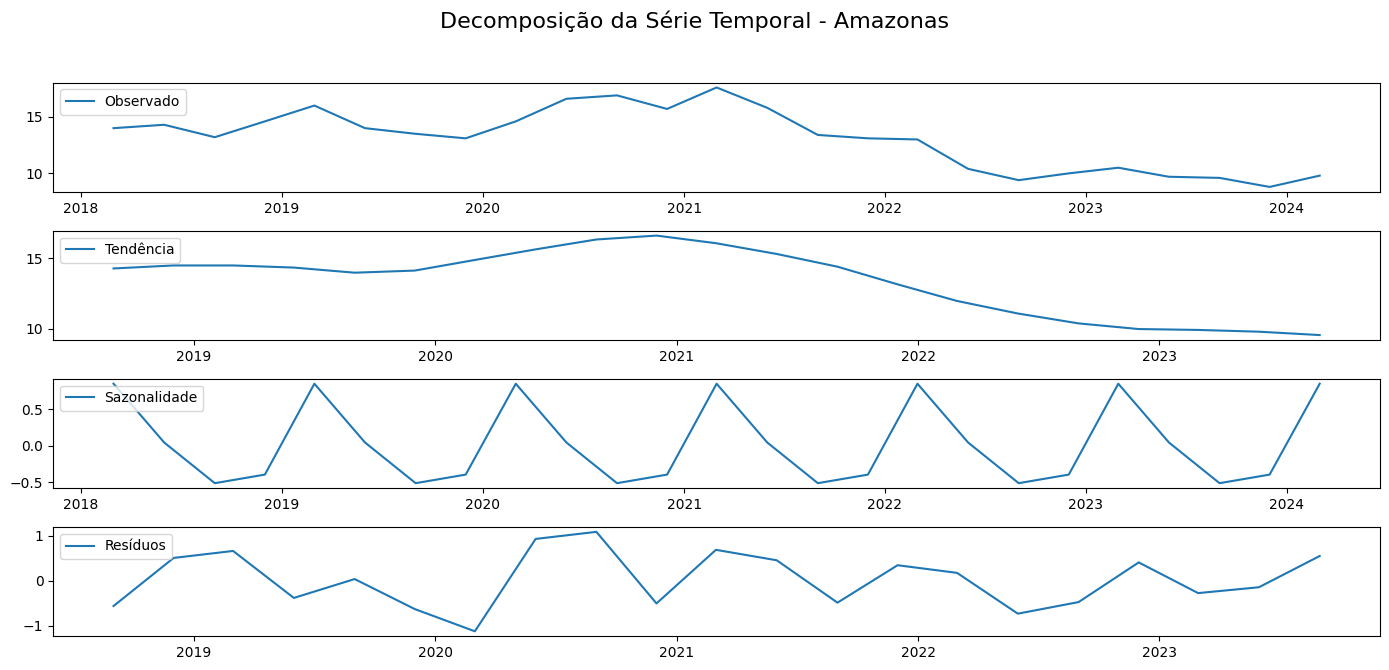

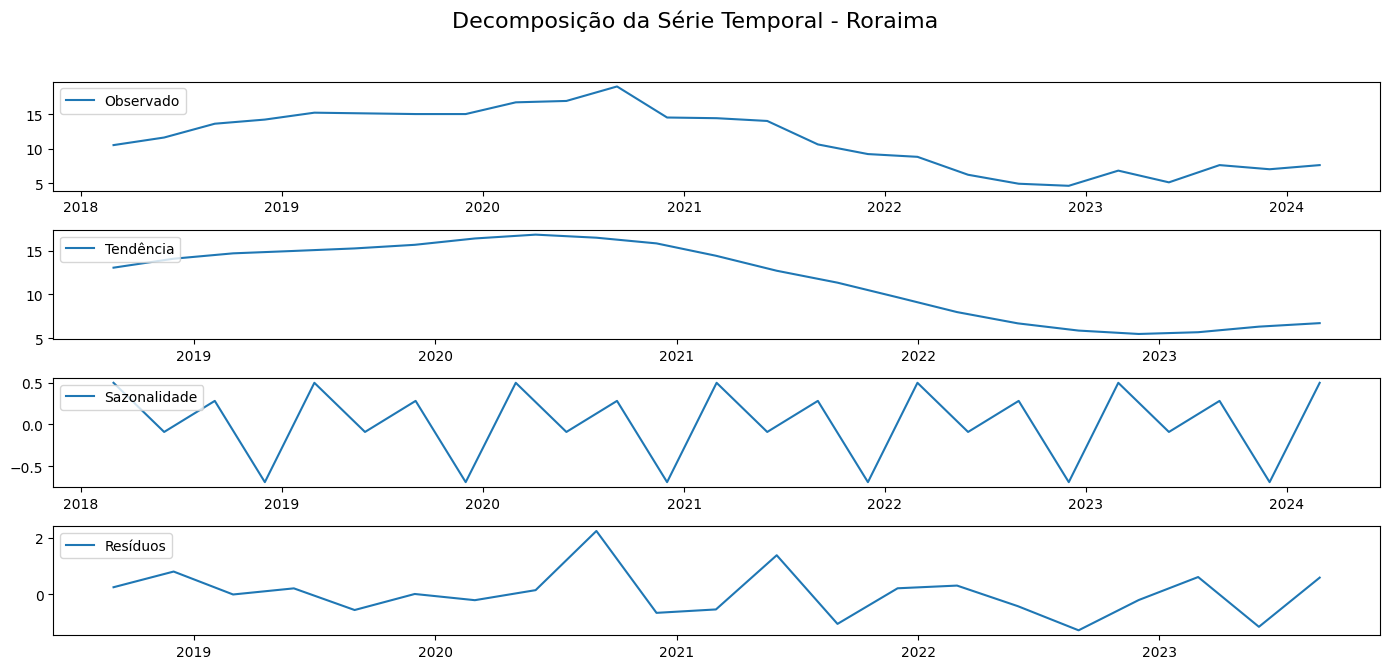

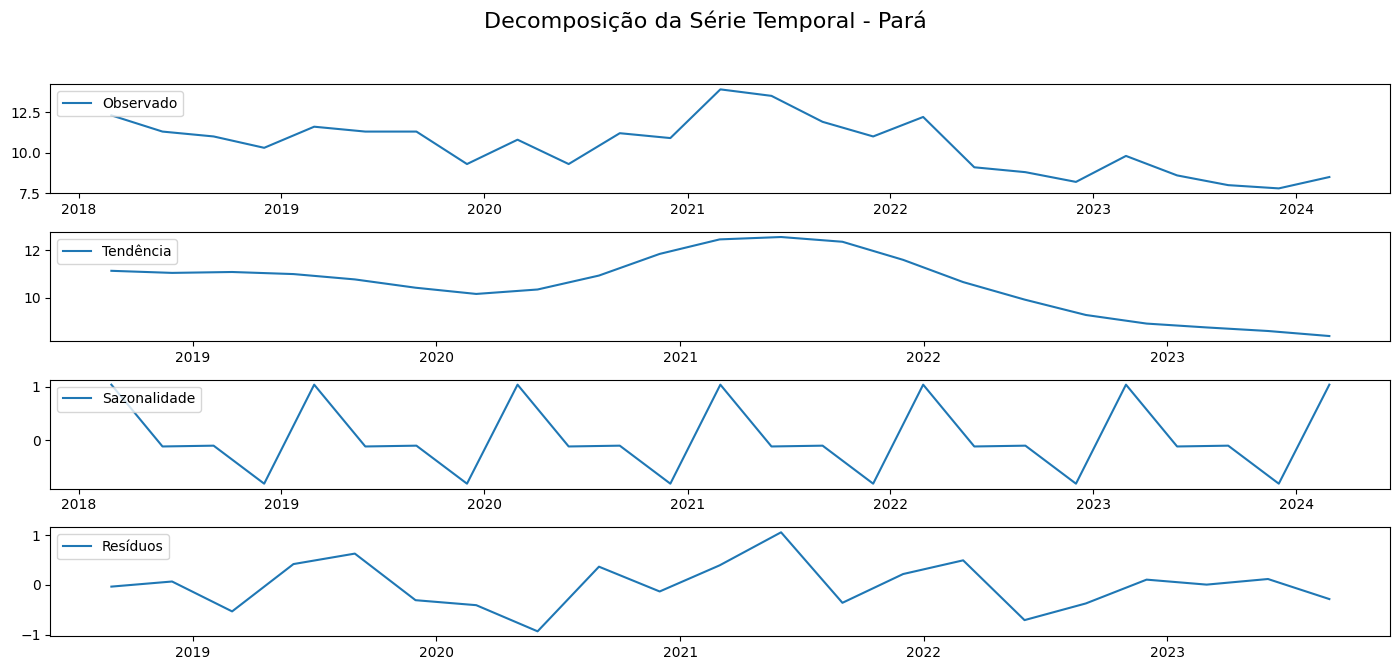

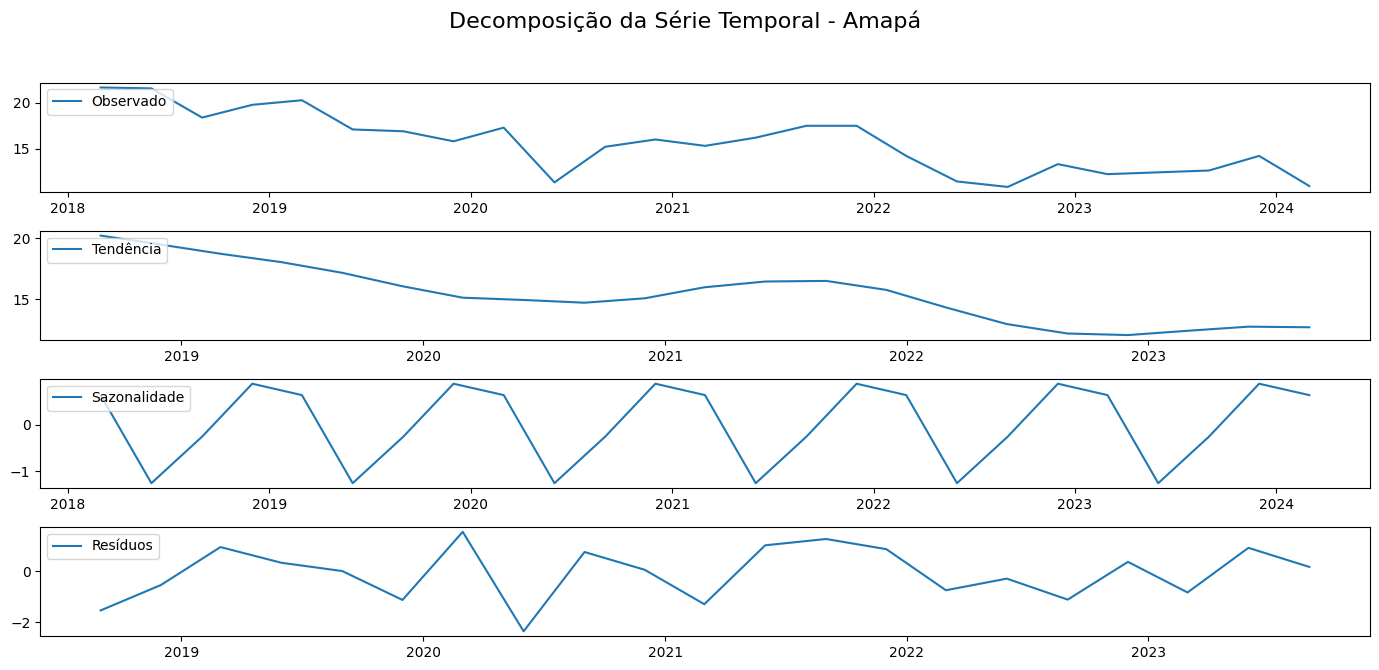

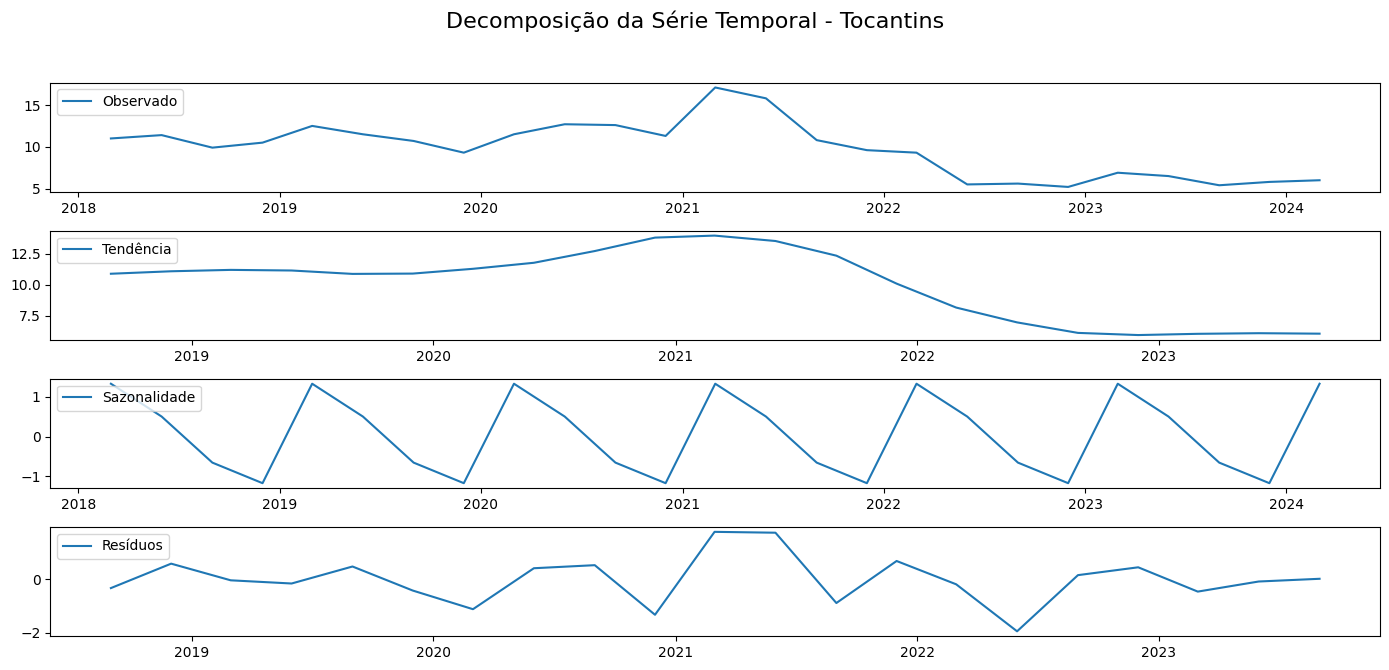

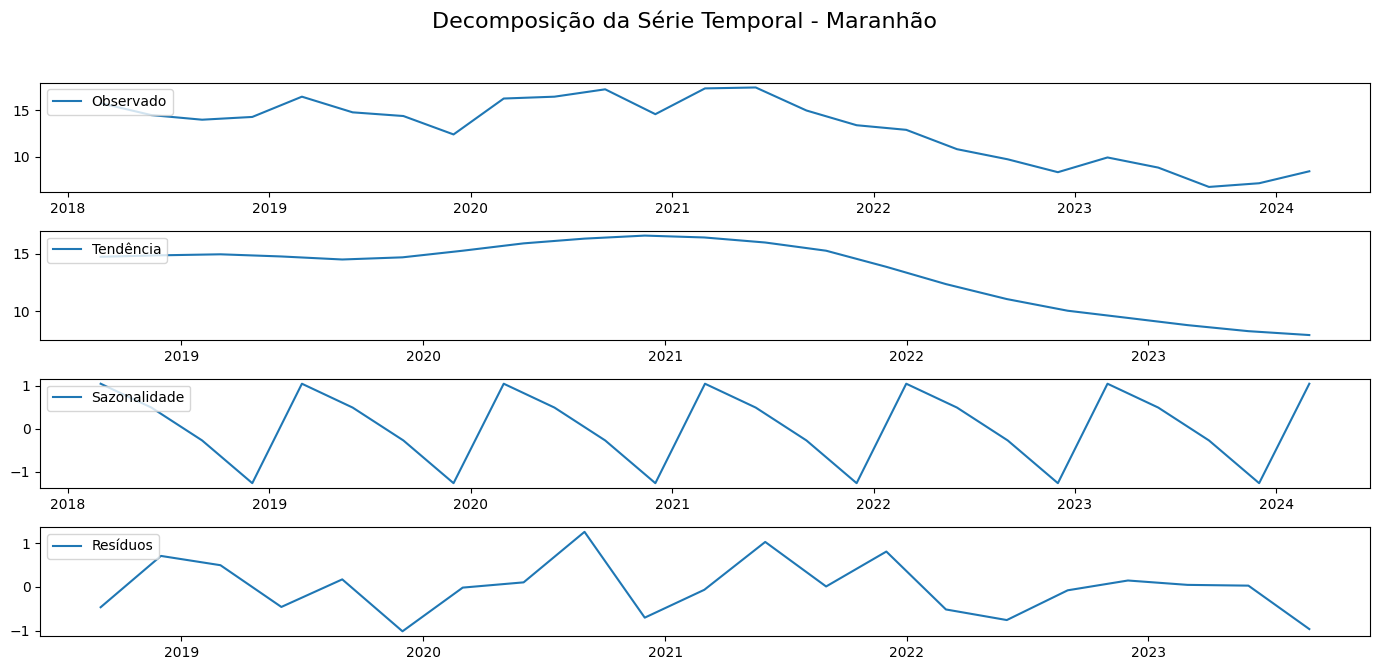

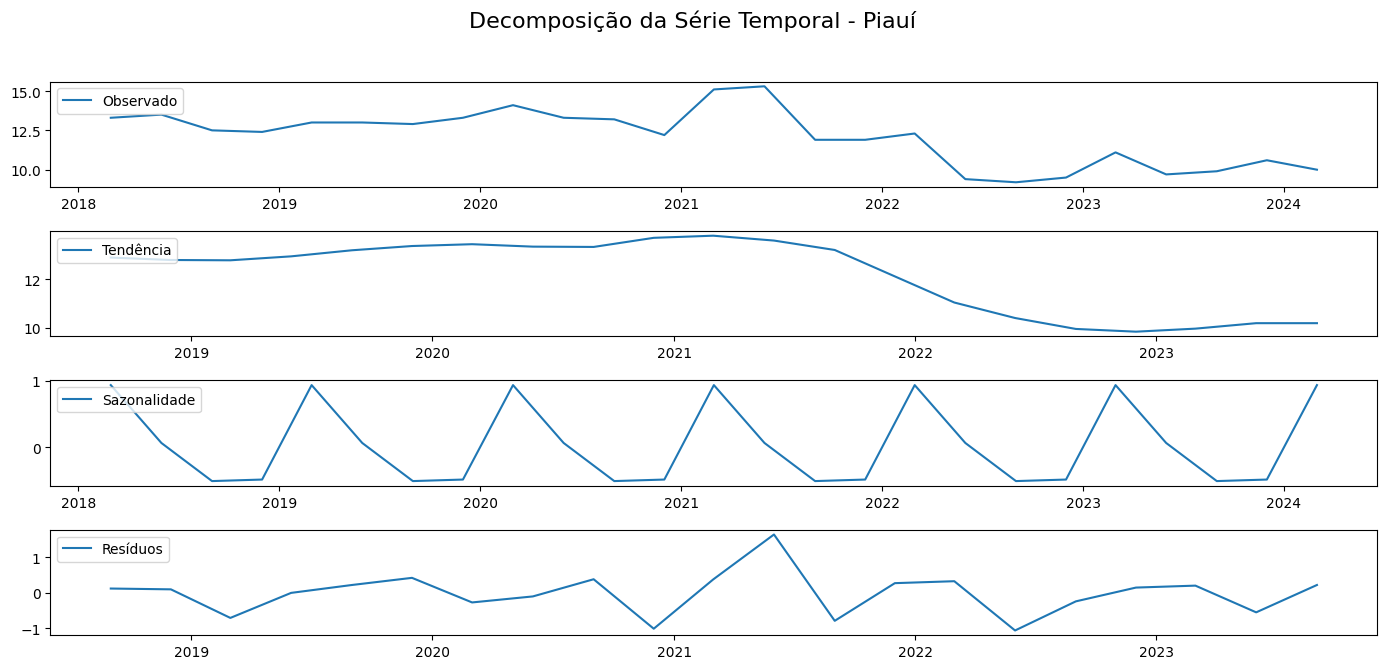

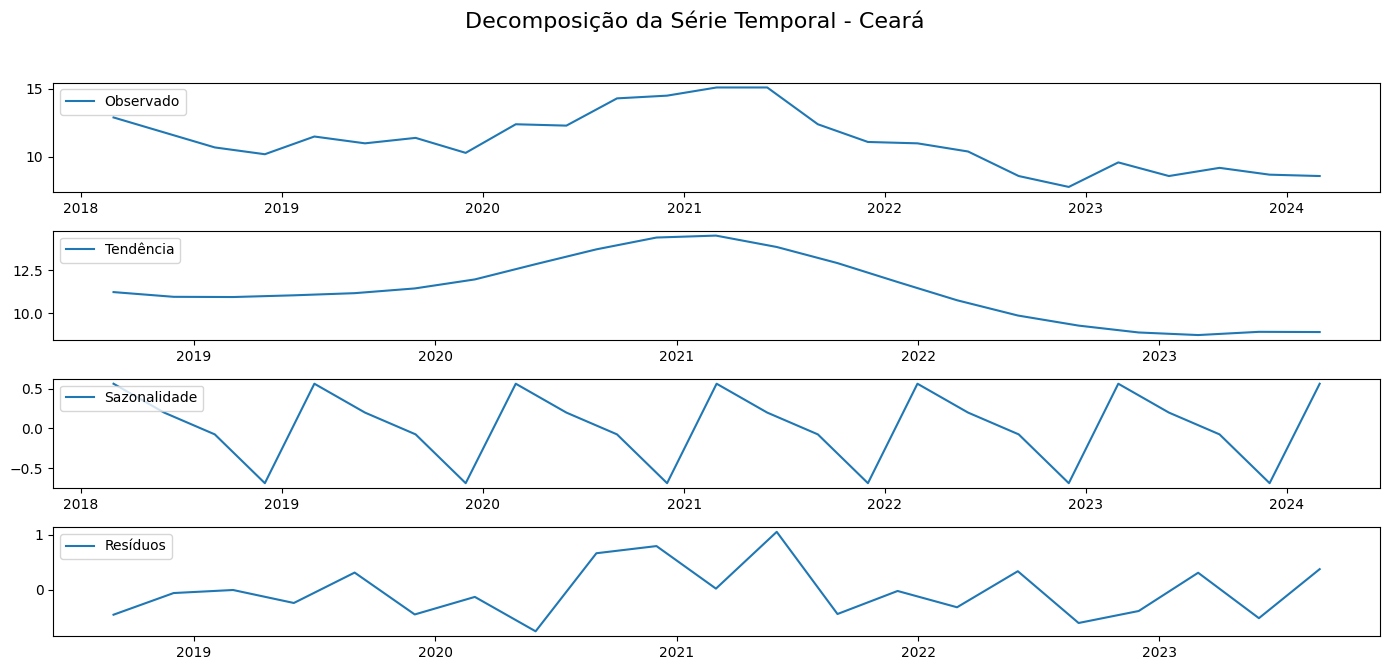

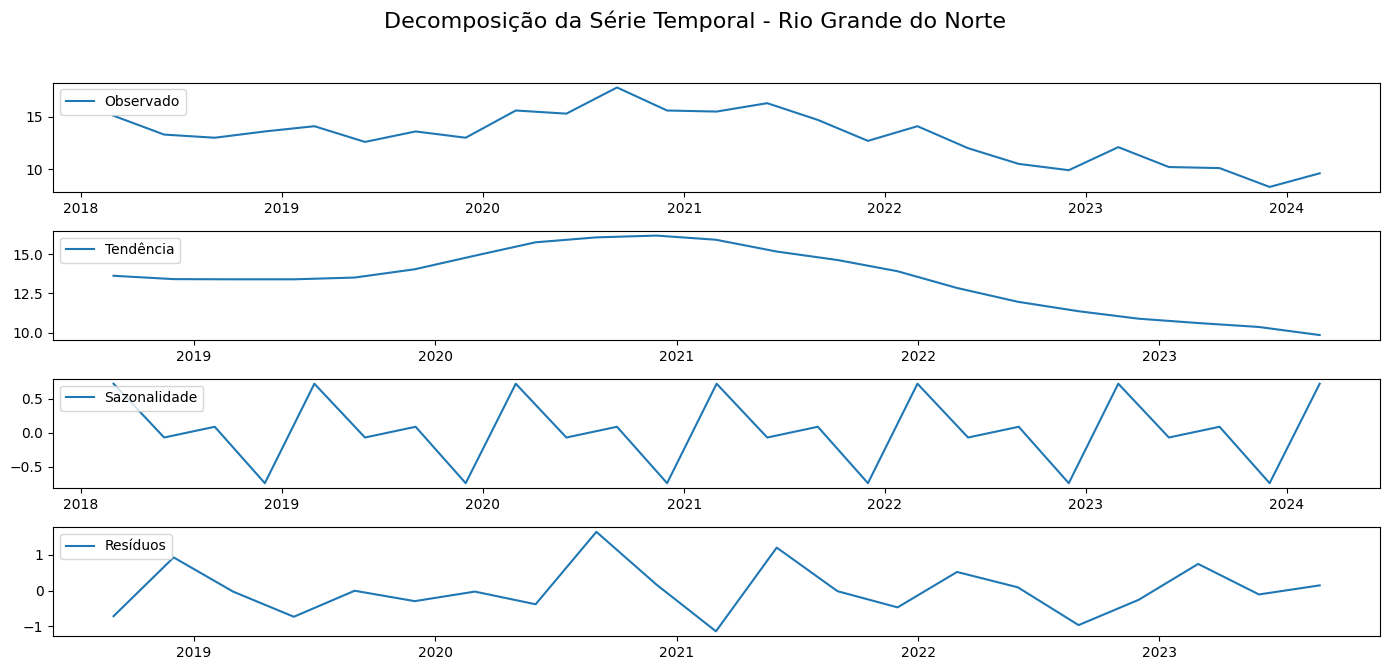

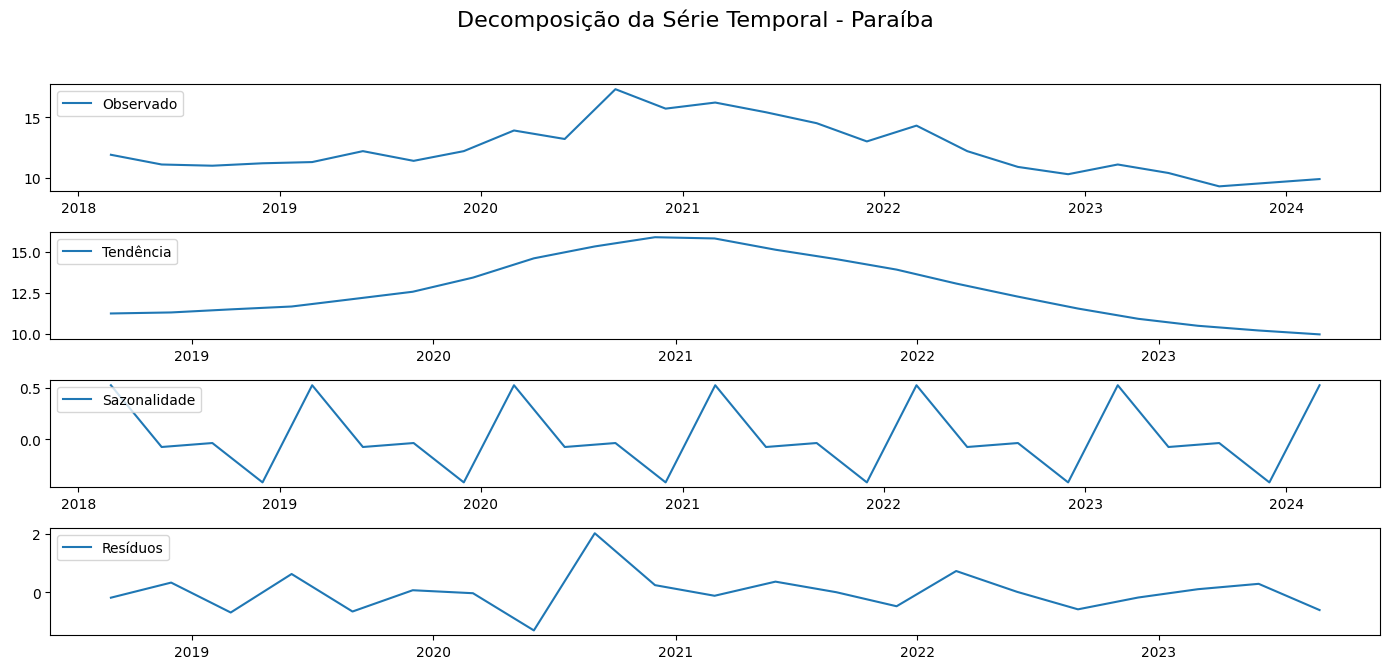

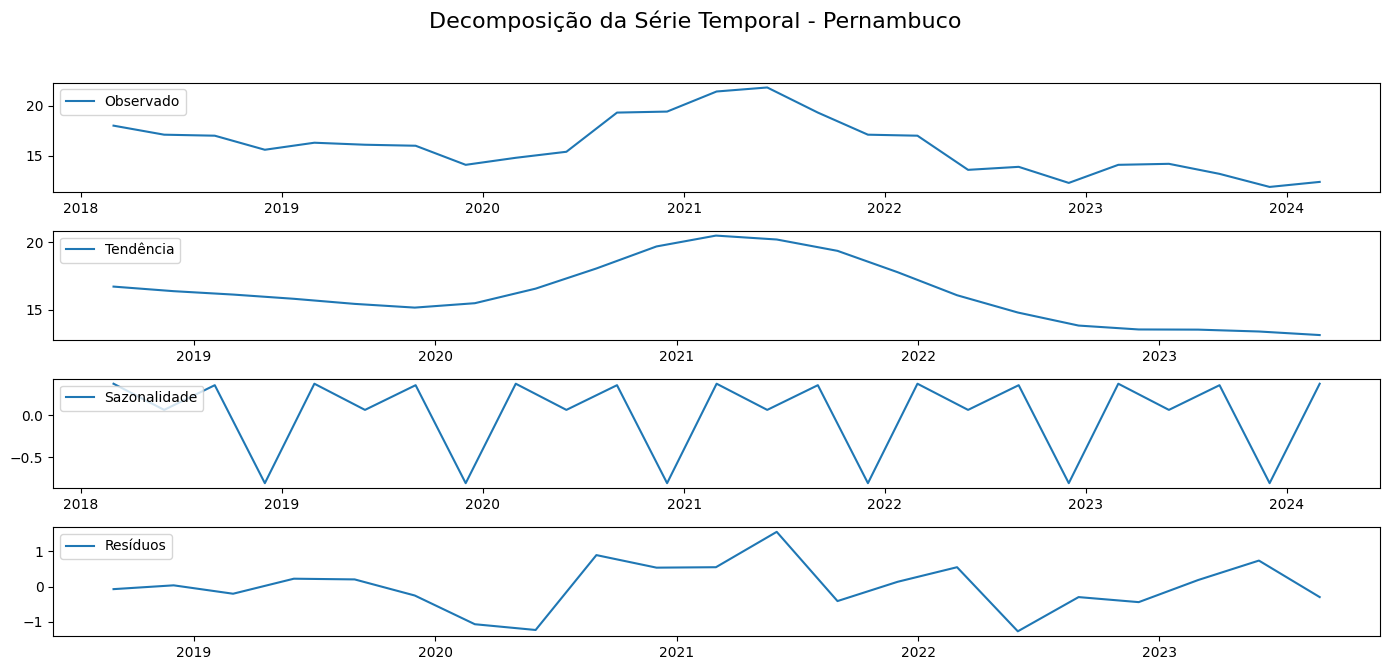

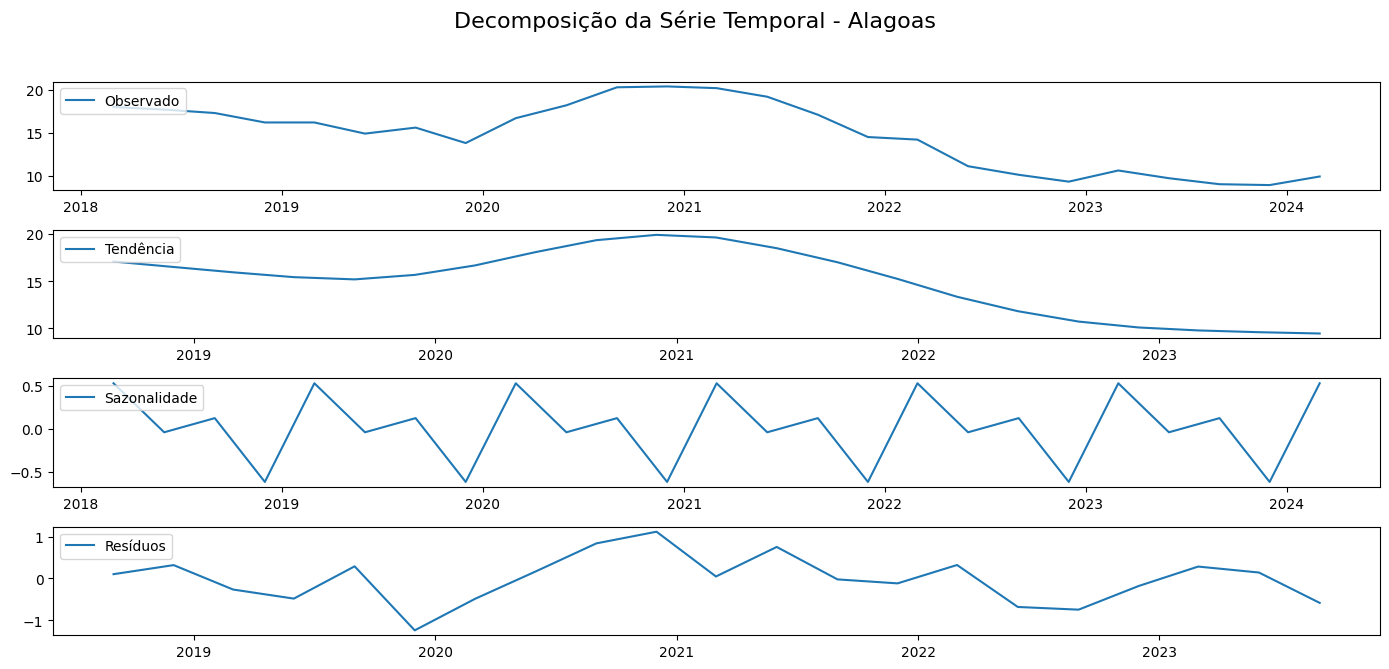

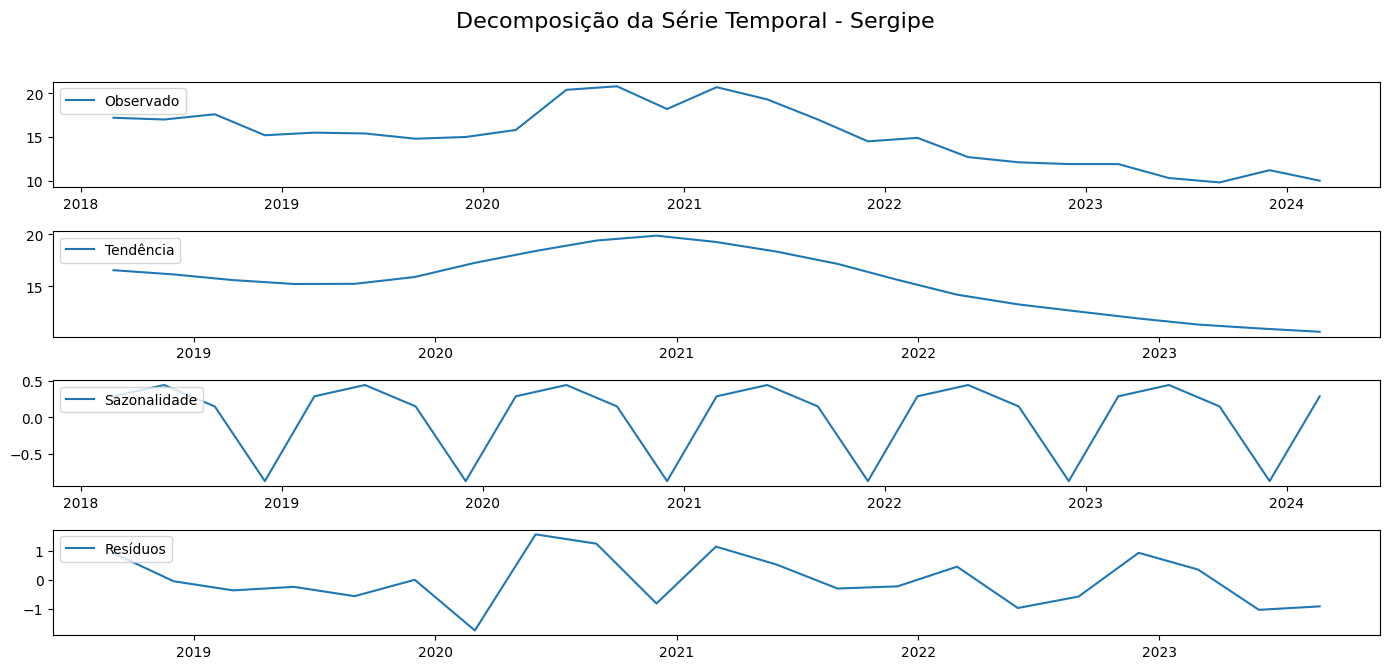

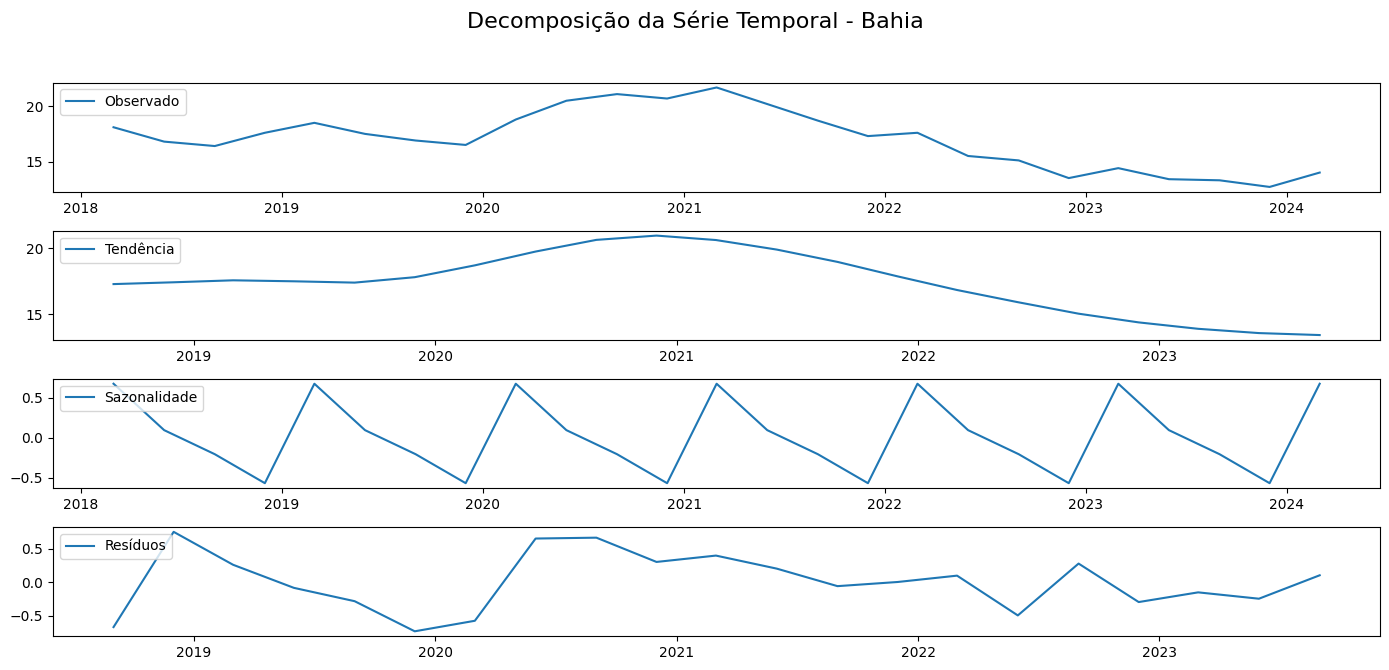

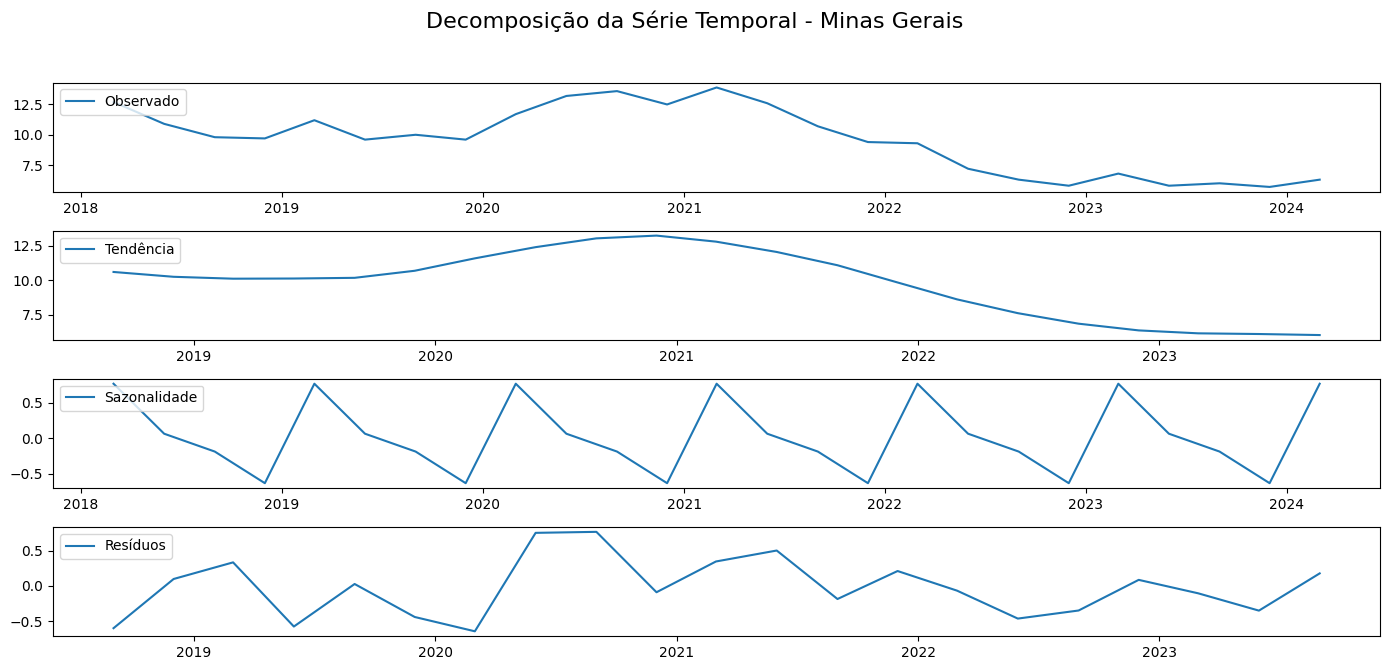

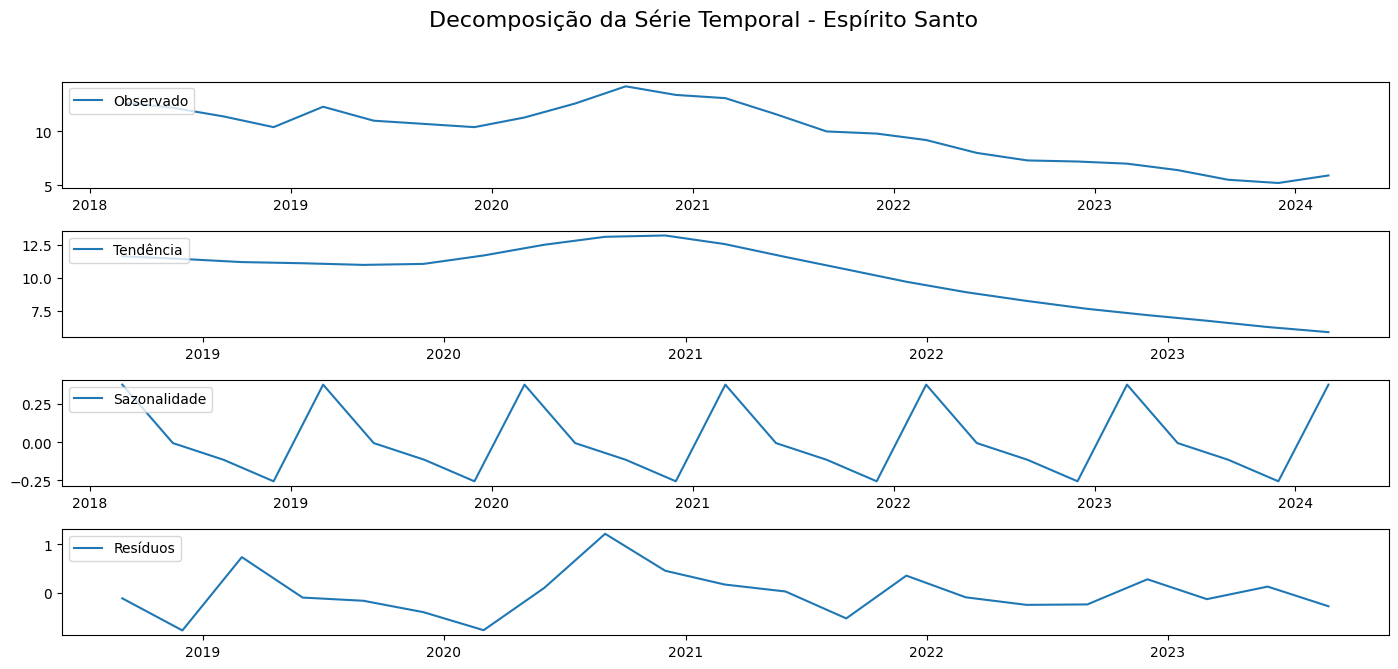

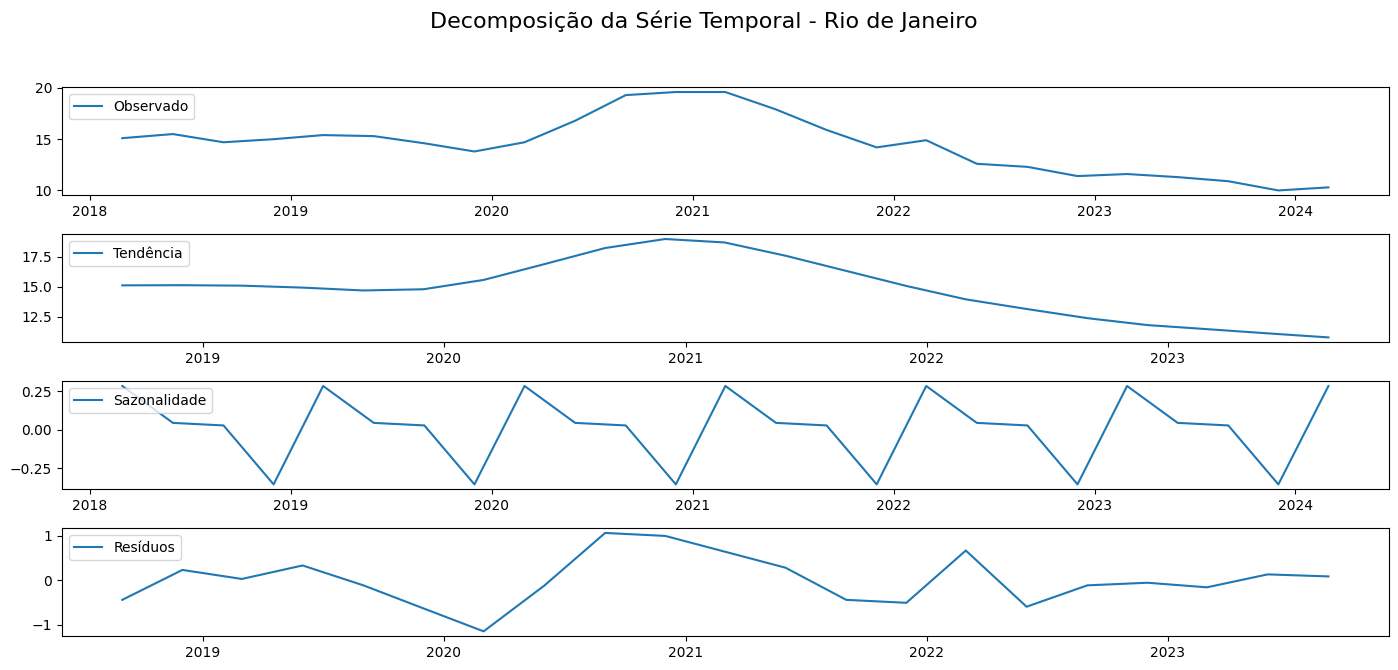

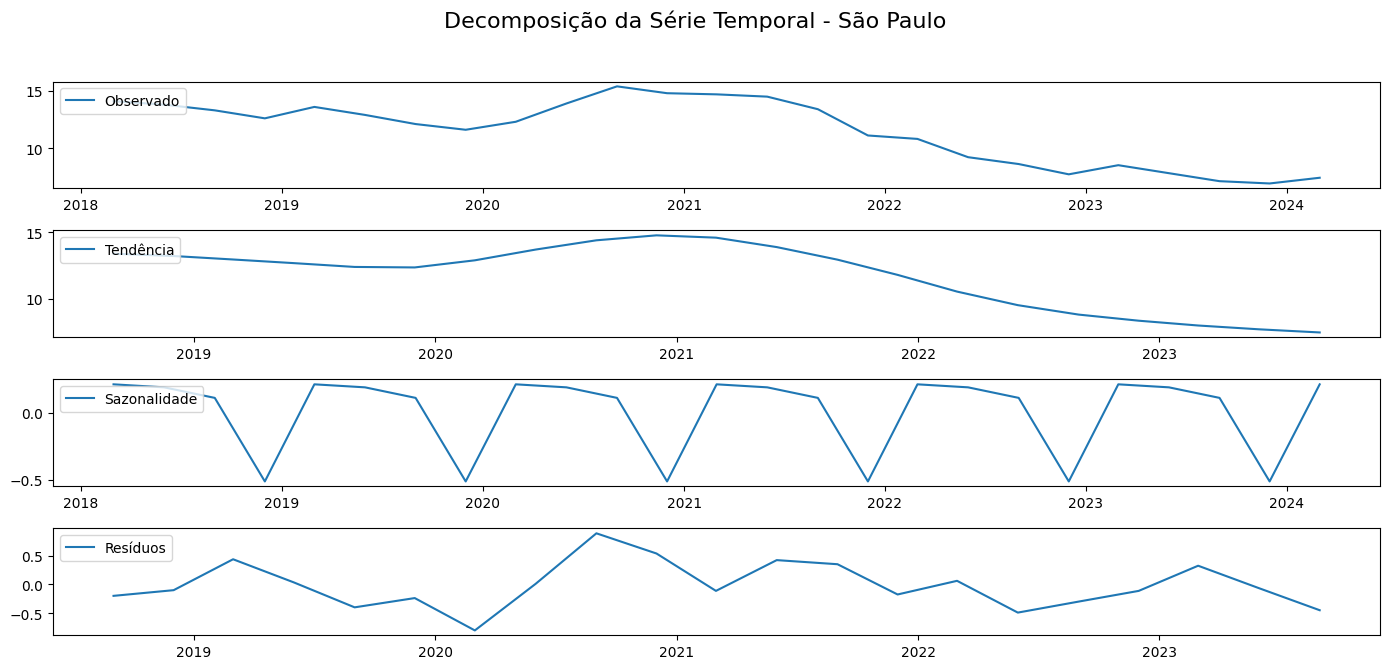

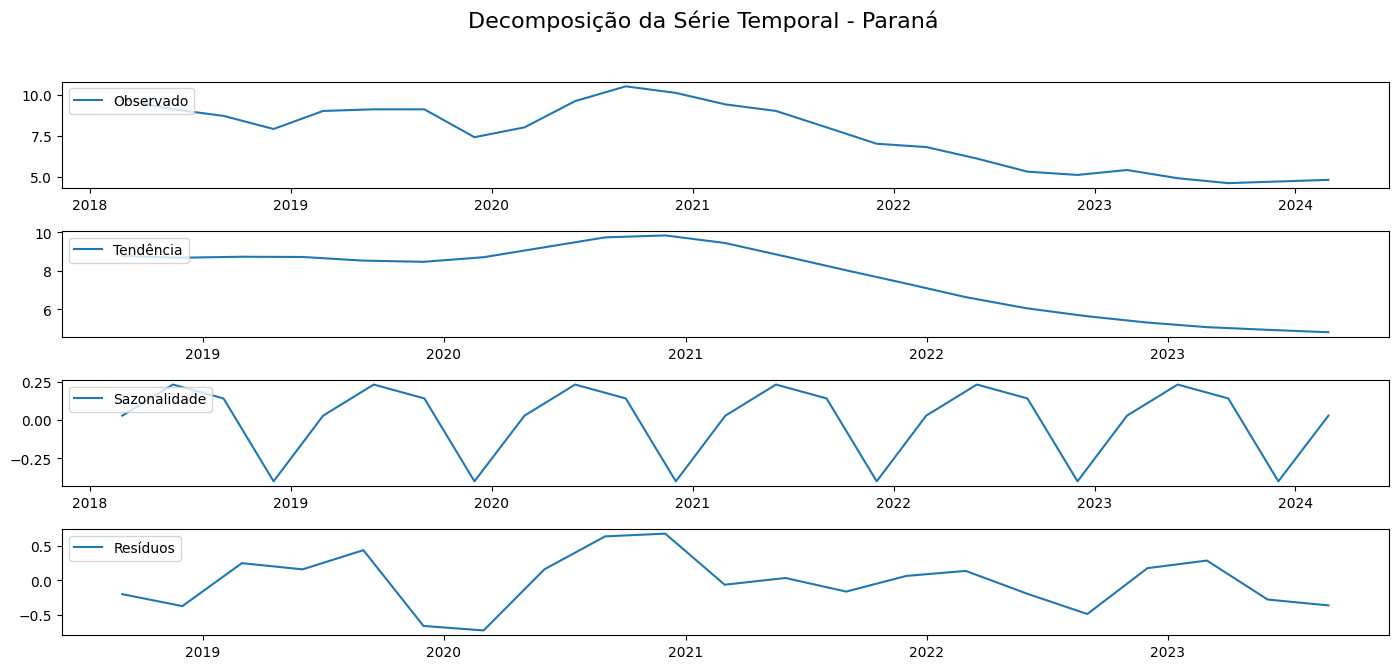

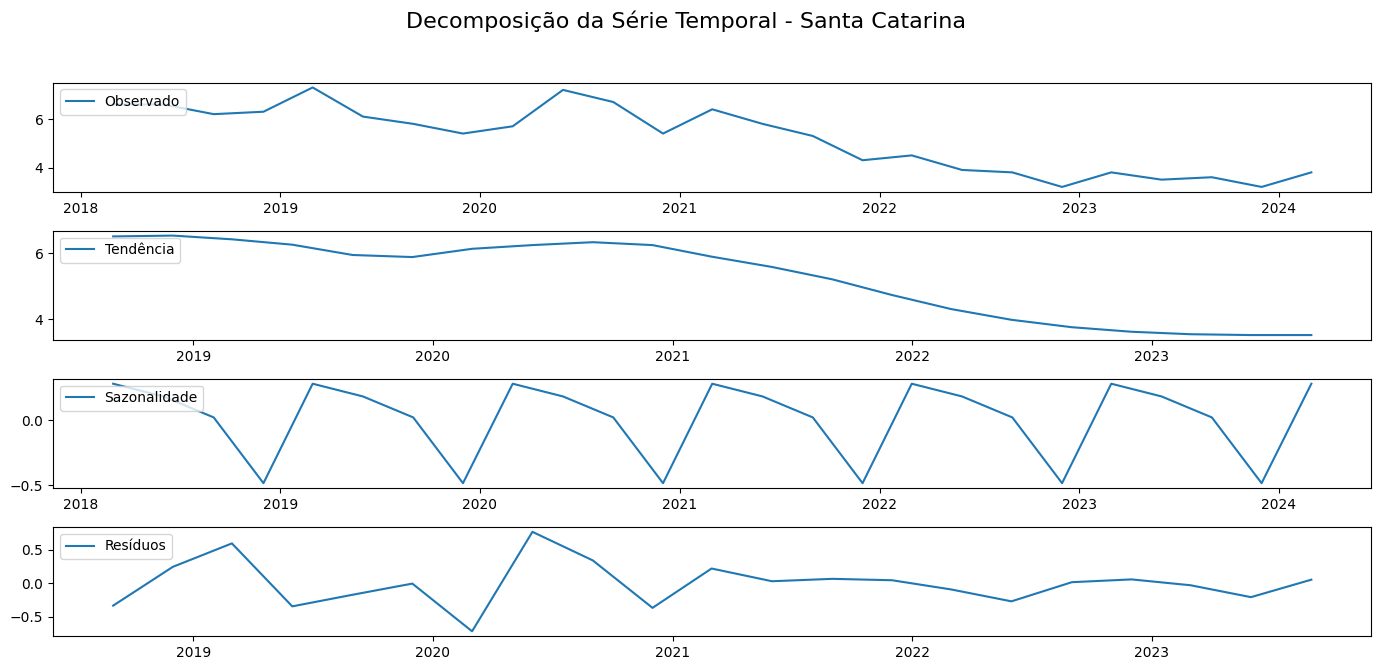

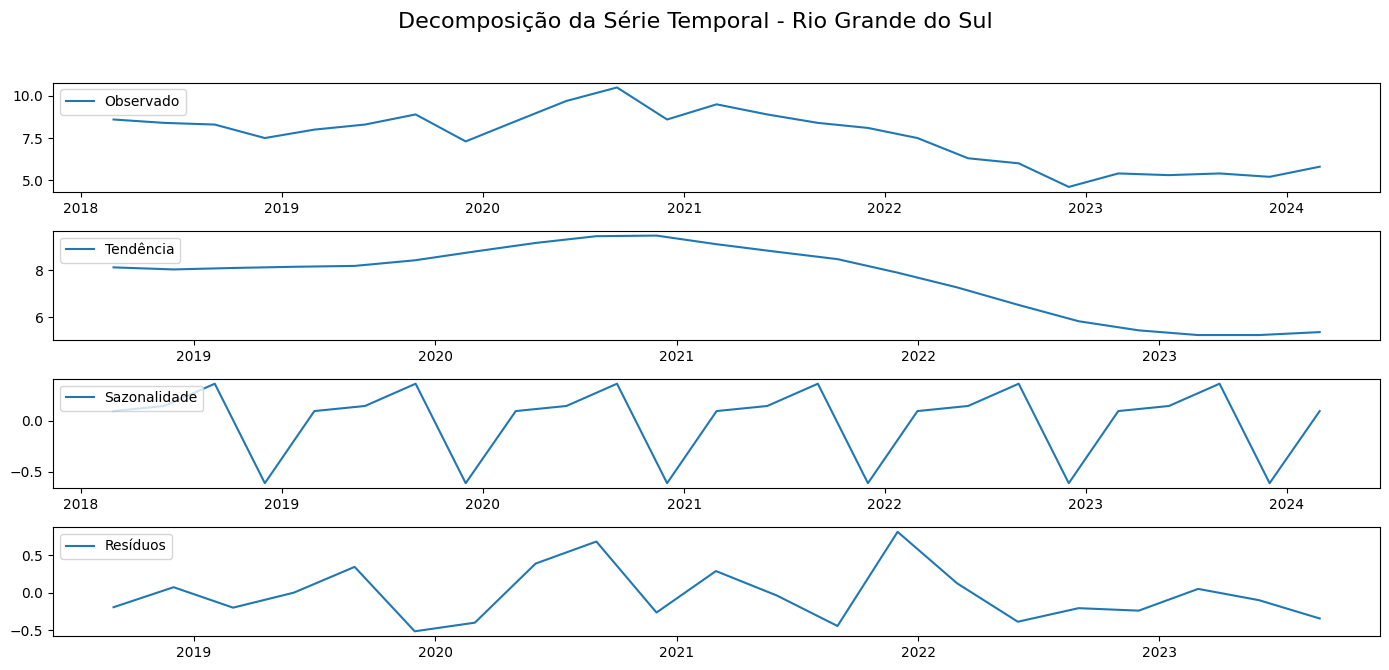

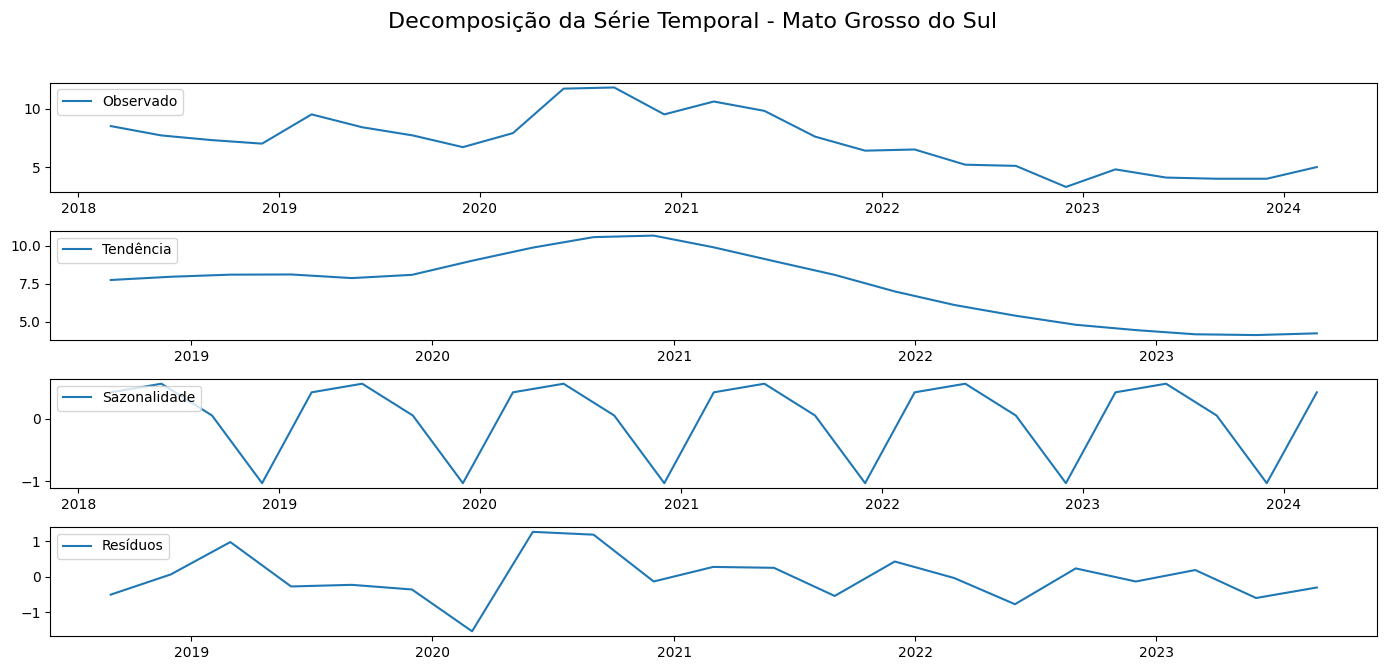

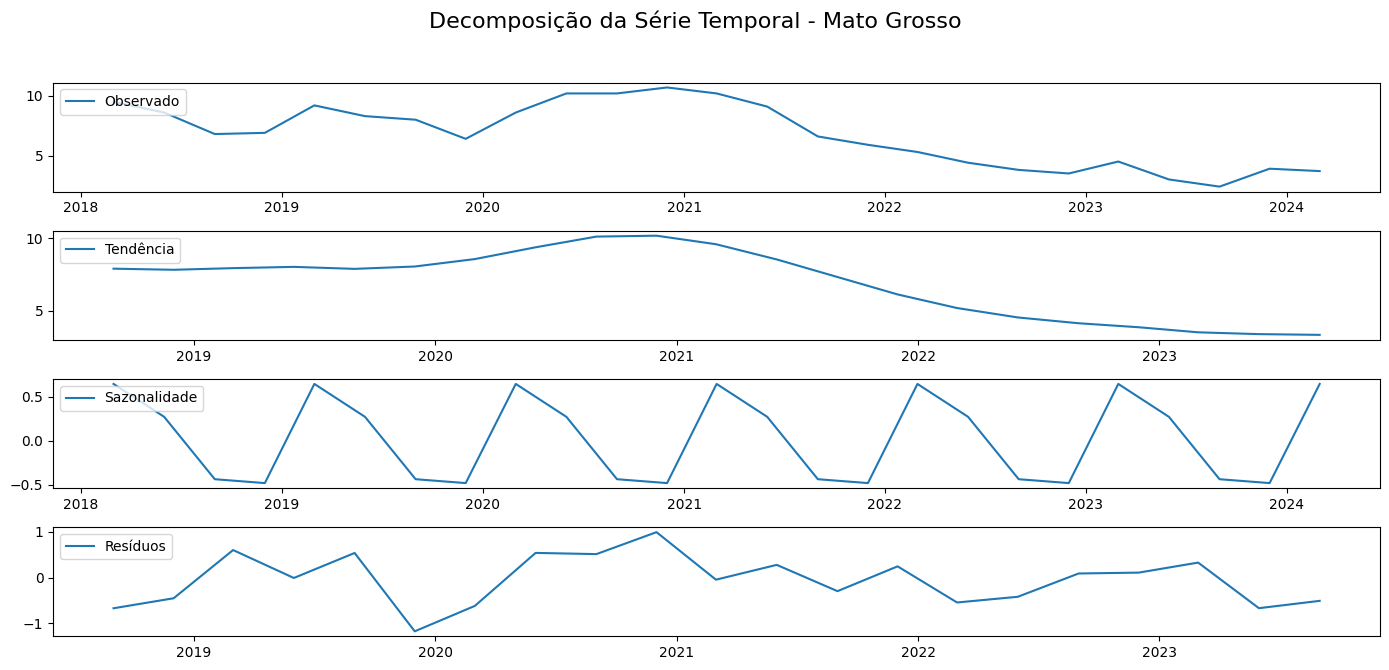

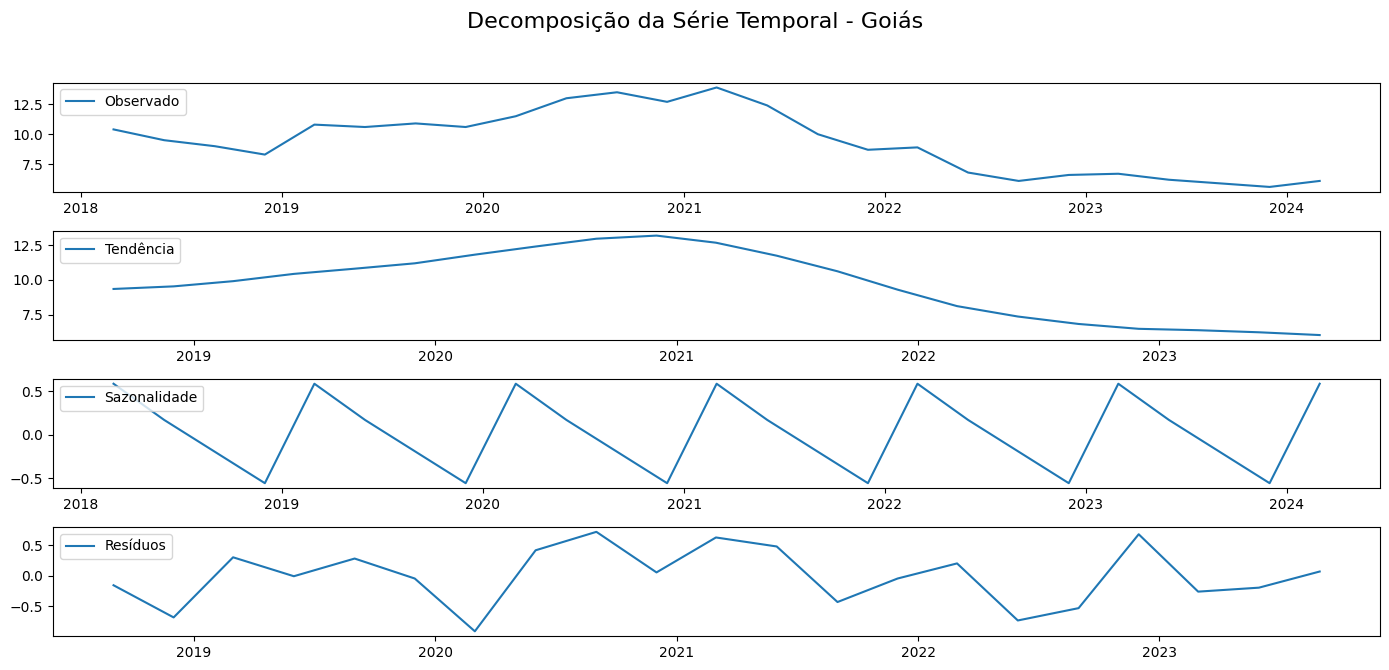

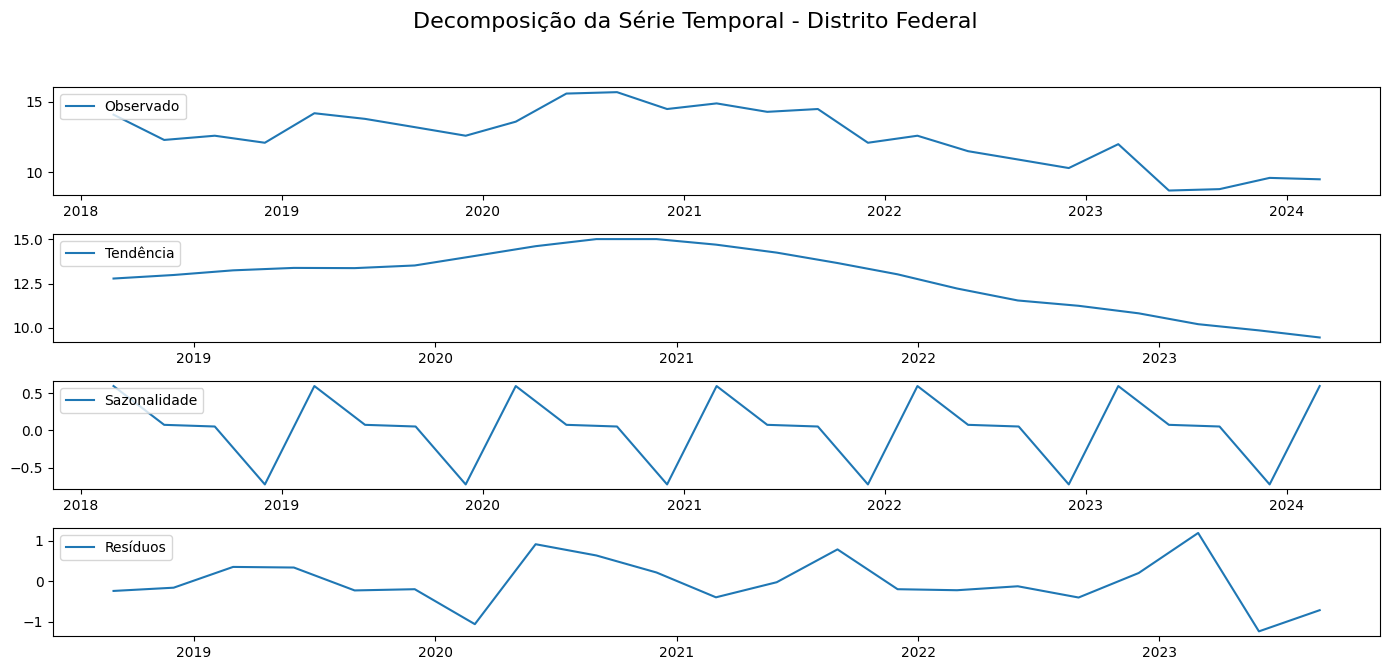

In [7]:
# Obtendo a lista de estados únicos
estados = data['Estado'].unique()

# Iterando sobre cada estado e realizando a decomposição da série temporal
for estado in estados:
    # Filtrando os dados para o estado atual
    estado_data = data[data['Estado'] == estado]

    # Definindo o índice do DataFrame como o trimestre
    estado_data.set_index('Trimestre', inplace=True)

    # Decompondo a série temporal
    result = seasonal_decompose(estado_data['Taxa_desemprego'], model='additive', period=4)  # Ajuste o período conforme necessário

    # Plotando os resultados
    plt.figure(figsize=(14, 7))
    plt.suptitle(f'Decomposição da Série Temporal - {estado}', fontsize=16)

    plt.subplot(411)
    plt.plot(result.observed, label='Observado')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(result.trend, label='Tendência')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(result.seasonal, label='Sazonalidade')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(result.resid, label='Resíduos')
    plt.legend(loc='upper left')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

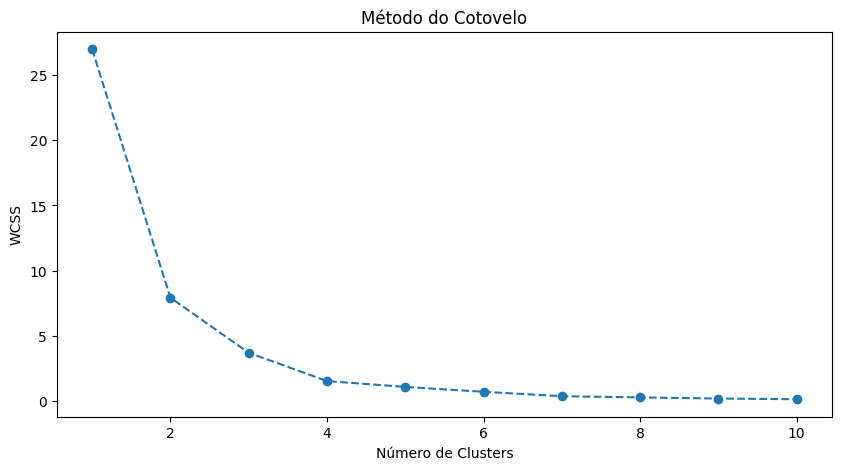

                 Estado  Taxa_desemprego  Cluster
0                  Acre           12.980        0
1               Alagoas           14.764        2
2                 Amapá           15.596        2
3              Amazonas           13.104        0
4                 Bahia           17.072        2
5                 Ceará           11.180        0
6      Distrito Federal           12.560        0
7        Espírito Santo            9.952        1
8                 Goiás            9.388        1
9              Maranhão           13.092        0
10          Mato Grosso            6.788        1
11   Mato Grosso do Sul            7.204        1
12         Minas Gerais            9.612        1
13               Paraná            7.572        1
14              Paraíba           12.380        0
15                 Pará           10.476        0
16           Pernambuco           16.052        2
17                Piauí           12.104        0
18  Rio Grande do Norte           13.144        0


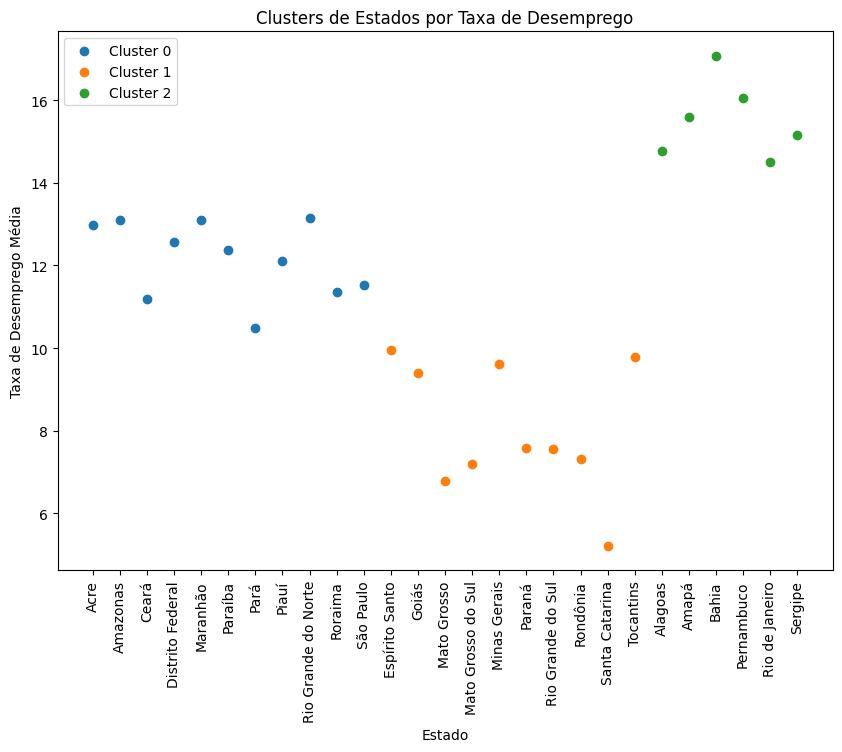

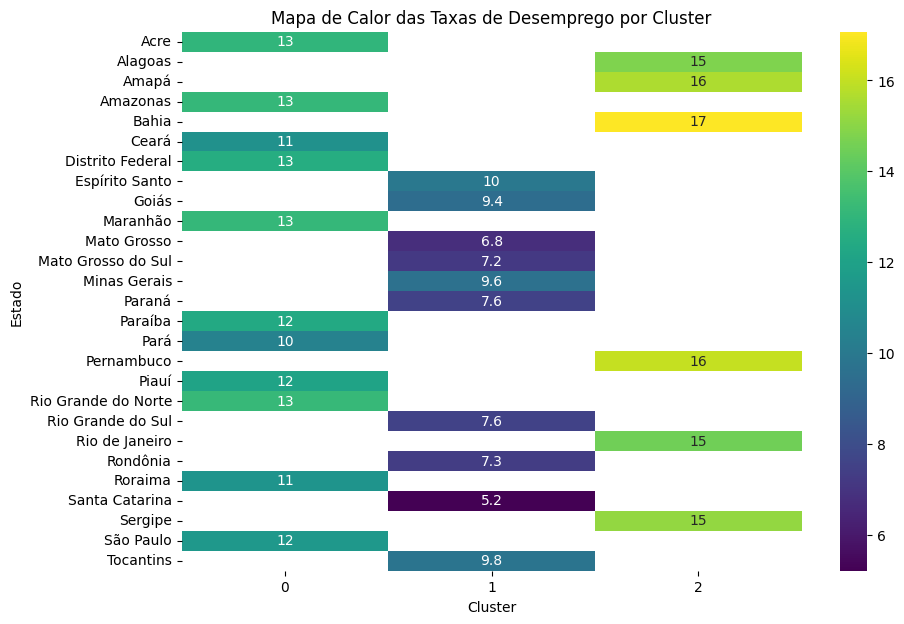

In [8]:
# Convertendo a coluna 'trimestre' para datetime
data['Trimestre'] = pd.to_datetime(data['Trimestre'], format='%Y-%m-%d')  # Ajuste o formato conforme necessário

# Agrupando os dados por estado e calculando a média da taxa de desemprego por estado
estado_data = data.groupby('Estado')['Taxa_desemprego'].mean().reset_index()

# Padronizando os dados
scaler = StandardScaler()
estado_data_scaled = scaler.fit_transform(estado_data[['Taxa_desemprego']])

# Encontrando o número ideal de clusters usando o método do cotovelo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(estado_data_scaled)
    wcss.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Aplicando K-means com o número ideal de clusters
n_clusters = 3  # Defina o número de clusters com base no gráfico do cotovelo
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(estado_data_scaled)

# Adicionando os clusters ao DataFrame original
estado_data['Cluster'] = clusters

# Exibindo os estados agrupados por clusters
print(estado_data)

# Visualizando os clusters
plt.figure(figsize=(10, 7))
for cluster in range(n_clusters):
    clustered_data = estado_data[estado_data['Cluster'] == cluster]
    plt.scatter(clustered_data['Estado'], clustered_data['Taxa_desemprego'], label=f'Cluster {cluster}')

plt.title('Clusters de Estados por Taxa de Desemprego')
plt.xlabel('Estado')
plt.ylabel('Taxa de Desemprego Média')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Calculando uma matriz de similaridade (por exemplo, matriz de correlação)
similarity_matrix = estado_data.pivot(index='Estado', columns='Cluster', values='Taxa_desemprego')

# Criando um heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(similarity_matrix, cmap='viridis', annot=True)
plt.title('Mapa de Calor das Taxas de Desemprego por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Estado')
plt.show()